In [1]:
# Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error,precision_score,r2_score,accuracy_score,make_scorer
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')
import tensorflow as tf

C:\Users\nirav\AppData\Local\Temp\ipykernel_18936\3489238524.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# READ CSV
df = pd.read_csv('../Datasets/Train.csv')
df.describe()

,Year,Modis AOD,Insat AOD,BLH,PM2p5
count,336.000000,320.000000,335.000000,336.000000,307.000000
mean,2018.000000,0.572360,1.137243,1347.786354,70.589994
std,2.002983,0.229100,1.141232,569.137495,45.383944
min,2015.000000,0.155000,0.099633,188.043080,8.083705
25%,2016.000000,0.401000,0.273872,971.385922,37.749254
50%,2018.000000,0.527750,0.716424,1243.731700,54.790984
75%,2020.000000,0.761813,1.566922,1745.395825,99.480157
max,2021.000000,1.251000,4.665590,2924.515400,327.505618


In [3]:
# Drop NaN values
df= df.dropna(subset=df.columns.values)
df.describe()

,Year,Modis AOD,Insat AOD,BLH,PM2p5
count,292.000000,292.000000,292.000000,292.000000,292.000000
mean,2018.160959,0.581920,1.157031,1404.847880,72.907573
std,1.922408,0.227521,1.111767,548.995261,45.210458
min,2015.000000,0.155000,0.099633,202.345720,17.796308
25%,2017.000000,0.405250,0.289225,1035.846850,39.499328
50%,2018.000000,0.540333,0.750375,1284.744250,56.317487
75%,2020.000000,0.773333,1.578022,1786.940225,103.206327
max,2021.000000,1.251000,4.658120,2924.515400,327.505618


In [4]:
# ENCODING CITY AND SEASON
le = LabelEncoder()
df['Season'] = le.fit_transform(df['Season'])
df['City'] = le.fit_transform(df['City'])
print(f"CITY:{df.City.unique()} \n Season:{df.Season.unique()}")
#df[0:20]

CITY:[ 0  1  2  3  4  5  6  7  8  9 10 11] 
 Season:[3 2 0 1]


In [5]:
# Scale AOD,BLH,PM2.5
scaler = StandardScaler()
num_cols = ['Modis AOD', 'Insat AOD', 'BLH']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [6]:
df

,City,Season,Year,Modis AOD,Insat AOD,BLH,PM2p5
1,0,3,2016,2.944313,-0.875670,-0.281450,166.870381
2,0,3,2017,0.966017,-0.891111,-0.533297,153.334547
3,0,3,2018,1.802537,-0.302757,-0.509989,162.460784
4,0,3,2019,1.155335,-0.382028,-0.502896,144.468391
5,0,3,2020,2.121002,-0.356718,-0.628475,139.467262
...,...,...,...,...,...,...,...
331,11,1,2017,1.180284,-0.495482,0.022991,167.764973
332,11,1,2018,0.431819,-0.548086,0.784919,115.422935
333,11,1,2019,1.552315,-0.309726,-0.321890,117.727001
334,11,1,2020,0.891905,-0.435217,0.208838,107.147698


In [7]:
X = df.drop('PM2p5', axis=1)
y = df['PM2p5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
print('Total',df.shape)
print('X',X_train.shape,X_test.shape)
print('Y',y_train.shape,y_test.shape)

Total (292, 7)
X (233, 6) (59, 6)
Y (233,) (59,)


In [ ]:
model = tf.keras.Sequential([

        tf.keras.layers.Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(180, activation='relu'),
        tf.keras.layers.Dense(180, activation='relu'),
        tf.keras.layers.Dense(180, activation='relu'),
       # tf.keras.layers.Dense(180, activation='relu'),
        tf.keras.layers.Dense(180, activation='relu'),

        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        #tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
    
        #tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dense(60, activation='relu'),
    
        tf.keras.layers.Dense(30, activation='relu'),
       # tf.keras.layers.Dense(30, activation='relu'),
    
        tf.keras.layers.Dense(10, activation='relu'),
        #tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1)


])

# compile the model with appropriate loss and optimization functions
model.compile(loss='mse', optimizer='adam')
# train the model on the training set
history = model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_test, y_test),verbose=1)

# evaluate the model on the testing set
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE: {score}')


y_pred = model.predict(X_test)
print(f'\nMean squared error: {mean_squared_error(y_test, y_pred)}')
print(f"\nR_squared : {r2_score(y_test, y_pred)}")
print(f"\nRMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")




In [8]:
# calculate the line of regression using numpy
slope, intercept = np.polyfit(y_pred.reshape(-1,), y_test, 1)
line_of_regression = slope * y_pred + intercept

# calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test, y_pred, s=50, alpha=0.8,color='b')
ax.plot(y_pred, line_of_regression, color='r', linewidth=2)
ax.set_xlabel('Actual', fontsize=14)
ax.set_ylabel('Predict', fontsize=14)
ax.set_title('Scatter Plot with Line of Regression', fontsize=16)

# add a legend with evaluation metrics
ax.text(0.1, 0.9, f'Mean Squared Error: {mse:.2f}', transform=ax.transAxes, fontsize=12)
ax.text(0.1, 0.85, f'R-squared: {r_squared:.2f}', transform=ax.transAxes, fontsize=12)
ax.text(0.1, 0.8, f'RMSE: {rmse:.2f}', transform=ax.transAxes, fontsize=12)

#plt.savefig('../plots/model/xgboost_model_3.png', dpi=300, bbox_inches='tight')

plt.show()

NameError: name 'y_pred' is not defined

In [11]:
# Random Forest estimator


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=30)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
model = grid_search.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'\nMean squared error: {mean_squared_error(y_test, y_pred)}')
print(f"\nR_squared : {r2_score(y_test, y_pred)}")
print(f"\nRMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")


Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.7135759031211977

Mean squared error: 331.3237290777315

R_squared : 0.8078849057373385

RMSE : 18.20230010404541


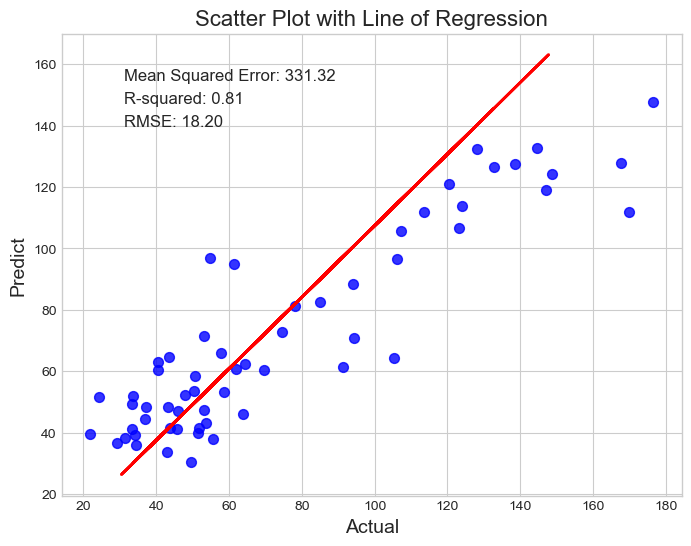

In [12]:
# calculate the line of regression using numpy
slope, intercept = np.polyfit(y_pred, y_test, 1)
line_of_regression = slope * y_pred + intercept

# calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test, y_pred, s=50, alpha=0.8,color='b')
ax.plot(y_pred, line_of_regression, color='r', linewidth=2)
ax.set_xlabel('Actual', fontsize=14)
ax.set_ylabel('Predict', fontsize=14)
ax.set_title('Scatter Plot with Line of Regression', fontsize=16)

# add a legend with evaluation metrics
ax.text(0.1, 0.9, f'Mean Squared Error: {mse:.2f}', transform=ax.transAxes, fontsize=12)
ax.text(0.1, 0.85, f'R-squared: {r_squared:.2f}', transform=ax.transAxes, fontsize=12)
ax.text(0.1, 0.8, f'RMSE: {rmse:.2f}', transform=ax.transAxes, fontsize=12)

#plt.savefig('../plots/model/xgboost_model_3.png', dpi=300, bbox_inches='tight')

plt.show()